In [1]:
import requests
from bs4 import BeautifulSoup

In [13]:
url_pagination= "https://www.premierleague.com/stats/top/players/touches"
r = requests.get(url_pagination)
soup = BeautifulSoup(r.content, "html.parser")


<!DOCTYPE html>

<html lang="en">
<head>
<meta content="Premier League Player Stats - Touches" name="twitter:title"/>
<meta content="Premier League, Football, Soccer, Official" name="keywords"/>
<meta content="website" property="og:type"/>
<meta content="View Touches played by Premier League players for 2018/19 and previous seasons, on the official website of the Premier League." name="description"/>
<meta content="View Touches played by Premier League players for 2018/19 and previous seasons, on the official website of the Premier League." name="twitter:description"/>
<meta content="https://s3.amazonaws.com/premierleague-static-files/premierleague/pl_icon.png" name="twitter:image"/>
<meta content="Premier League Player Stats - Touches" property="og:title"/>
<meta content="https://s3.amazonaws.com/premierleague-static-files/premierleague/pl_icon.png" property="og:image"/>
<title>Premier League Player Stats - Touches</title>
<meta content="#38003C" name="theme-color"/>
<meta content="Vi

In [14]:
title = soup.title.text
print(title)

Premier League Player Stats - Touches


In [18]:
name = soup.find('span', {'class': 'badge-50 LEI '}).text
print(name)

In [30]:
name = soup.find_all('a', {'class': 'playerName'})

for a in name:
    print(a.text)
    
main_stat = soup.find_all('td', {'class': 'mainStat'})

for a in main_stat:
    print(a.text)


Gareth Barry

Leighton Baines

Cesc Fàbregas

Gaël Clichy

Michael Carrick

James Milner

Bacary Sagna

Glen Johnson

Steven Gerrard

Wayne Rooney

Phil Jagielka

Mark Noble

Antonio Valencia

David Silva

John Terry

Yaya Touré

Stewart Downing

Jordan Henderson

Mikel Arteta

Patrice Evra
27,238
25,304
24,168
23,444
22,525
21,963
21,068
21,039
20,750
20,714
20,577
19,842
19,747
19,253
18,702
18,372
18,270
18,249
18,157
17,960


In [3]:
import pandas as pd
df_goals = pd.read_csv('goals_data.csv', sep=',')

In [6]:
df_goals_season = df_goals[df_goals['year'] == "2017/2018"]

In [7]:
df_touches = pd.read_csv('touches_data.csv', sep=',')

In [8]:
df_touches_season = df_touches[df_touches['year'] == "2017/2018"]

In [10]:
df_goals_season.head()

,Unnamed: 0,player_name,goals,year
22,0,Mohamed Salah,32,2017/2018
23,1,Harry Kane,30,2017/2018
24,2,Sergio Agüero,21,2017/2018
25,3,Jamie Vardy,20,2017/2018
26,4,Raheem Sterling,18,2017/2018


In [11]:
merged_df = pd.merge(df_goals_season, df_touches_season, on='player_name')

In [12]:
merged_df.head(5)

,Unnamed: 0_x,player_name,goals,year_x,Unnamed: 0_y,touches,year_y
0,0,Mohamed Salah,32,2017/2018,10,1643,2017/2018
1,1,Harry Kane,30,2017/2018,18,1263,2017/2018
2,2,Sergio Agüero,21,2017/2018,10,1007,2017/2018
3,3,Jamie Vardy,20,2017/2018,19,842,2017/2018
4,4,Raheem Sterling,18,2017/2018,2,1719,2017/2018


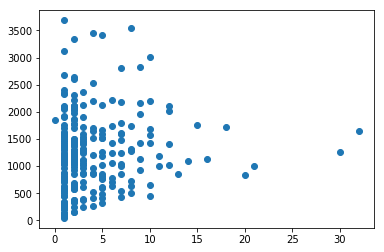

In [14]:
import matplotlib.pyplot as plt

plt.scatter(merged_df.goals, merged_df.touches)
plt.show()

In [20]:
merged_df['ratio'] = merged_df.touches / merged_df.goals

In [21]:
merged_df.loc[merged_df['ratio'].idxmax()]

Unnamed: 0_x                6
player_name      Granit Xhaka
goals                       1
year_x              2017/2018
Unnamed: 0_y                0
touches                  3688
year_y              2017/2018
ratio                    3688
Name: 246, dtype: object

In [22]:
merged_df.loc[merged_df['ratio'].idxmin()]

Unnamed: 0_x              1
player_name      Harry Kane
goals                    30
year_x            2017/2018
Unnamed: 0_y             18
touches                1263
year_y            2017/2018
ratio                  42.1
Name: 1, dtype: object

In [24]:
merged_df.nsmallest(10, 'ratio')

,Unnamed: 0_x,player_name,goals,year_x,Unnamed: 0_y,touches,year_y,ratio
1,1,Harry Kane,30,2017/2018,18,1263,2017/2018,42.100000
3,3,Jamie Vardy,20,2017/2018,19,842,2017/2018,42.100000
230,10,Henri Saivet,1,2017/2018,13,44,2017/2018,44.000000
15,15,Pierre-Emerick Aubameyang,10,2017/2018,5,455,2017/2018,45.500000
2,2,Sergio Agüero,21,2017/2018,10,1007,2017/2018,47.952381
0,0,Mohamed Salah,32,2017/2018,10,1643,2017/2018,51.343750
37,17,Charlie Austin,7,2017/2018,11,422,2017/2018,60.285714
32,12,Oumar Niasse,8,2017/2018,18,497,2017/2018,62.125000
62,2,Manolo Gabbiadini,5,2017/2018,16,318,2017/2018,63.600000
21,1,Chris Wood,10,2017/2018,5,648,2017/2018,64.800000


In [25]:
merged_df[merged_df.goals > 10].nlargest(10, 'ratio')

,Unnamed: 0_x,player_name,goals,year_x,Unnamed: 0_y,touches,year_y,ratio
10,10,Riyad Mahrez,12,2017/2018,1,2104,2017/2018,175.333333
9,9,Eden Hazard,12,2017/2018,11,2010,2017/2018,167.500000
6,6,Roberto Firmino,15,2017/2018,17,1754,2017/2018,116.933333
12,12,Son Heung-Min,12,2017/2018,3,1402,2017/2018,116.833333
13,13,Marko Arnautovic,11,2017/2018,15,1179,2017/2018,107.181818
4,4,Raheem Sterling,18,2017/2018,2,1719,2017/2018,95.500000
14,14,Álvaro Morata,11,2017/2018,11,1006,2017/2018,91.454545
11,11,Glenn Murray,12,2017/2018,9,1013,2017/2018,84.416667
7,7,Alexandre Lacazette,14,2017/2018,12,1093,2017/2018,78.071429
5,5,Romelu Lukaku,16,2017/2018,4,1128,2017/2018,70.500000


In [26]:
merged_df[merged_df.goals > 10].nsmallest(10, 'ratio')

,Unnamed: 0_x,player_name,goals,year_x,Unnamed: 0_y,touches,year_y,ratio
1,1,Harry Kane,30,2017/2018,18,1263,2017/2018,42.100000
3,3,Jamie Vardy,20,2017/2018,19,842,2017/2018,42.100000
2,2,Sergio Agüero,21,2017/2018,10,1007,2017/2018,47.952381
0,0,Mohamed Salah,32,2017/2018,10,1643,2017/2018,51.343750
8,8,Gabriel Jesus,13,2017/2018,13,860,2017/2018,66.153846
5,5,Romelu Lukaku,16,2017/2018,4,1128,2017/2018,70.500000
7,7,Alexandre Lacazette,14,2017/2018,12,1093,2017/2018,78.071429
11,11,Glenn Murray,12,2017/2018,9,1013,2017/2018,84.416667
14,14,Álvaro Morata,11,2017/2018,11,1006,2017/2018,91.454545
4,4,Raheem Sterling,18,2017/2018,2,1719,2017/2018,95.500000


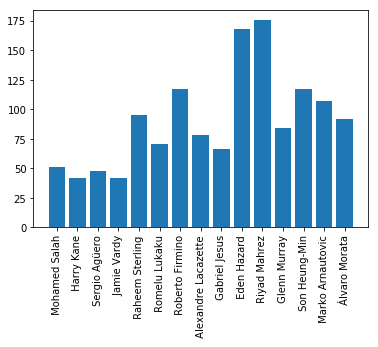

In [32]:
plt.bar(merged_df['player_name'][merged_df.goals > 10], merged_df['ratio'][merged_df.goals > 10])
plt.xticks(rotation=90)
plt.show()

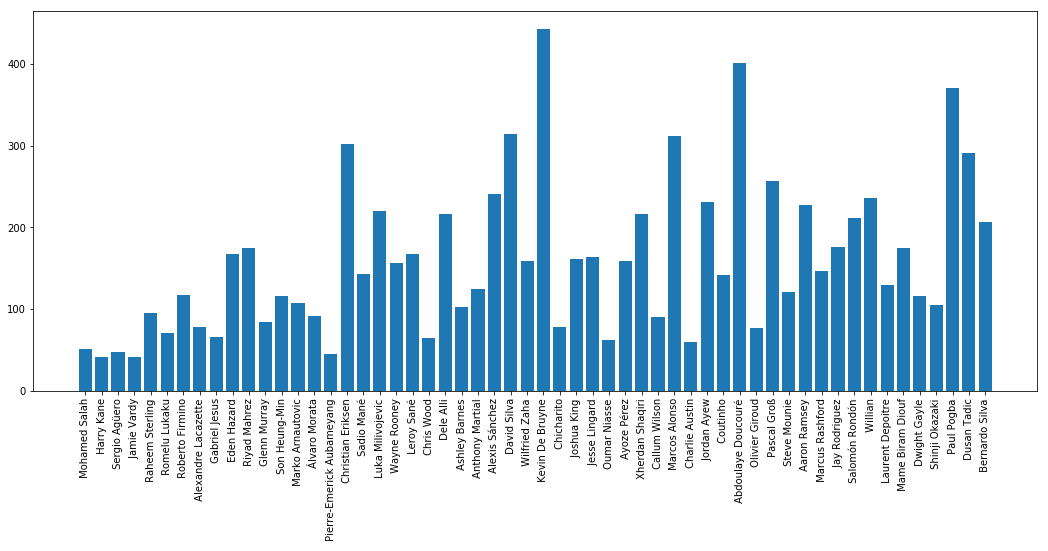

In [38]:
plt.figure(figsize=(18,7))

plt.bar(merged_df['player_name'][merged_df.goals > 5], merged_df['ratio'][merged_df.goals > 5])
plt.xticks(rotation=90)
plt.show()

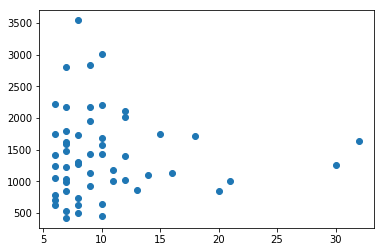

In [39]:
plt.scatter(merged_df['goals'][merged_df.goals > 5], merged_df['touches'][merged_df.goals > 5])
plt.show()